In [3]:
from entropy import *
from pyentrp import entropy as ent
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234567)
T = 100
N = 10000

# Time vector
x = np.linspace(0,T, N)

# Uniformly distributed noise
y = np.random.rand(N)

f1 = T/100
f2 = T/1000
y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

plt.figure()
plt.plot(x, y, 'k-')
plt.plot(x, y1 + y2 +  y, 'r--')
plt.show()

print(sample_entropy(y, order=2, metric='chebyshev'))           # Sample entropy
print(sample_entropy(y1 + y2 + y, order=2, metric='chebyshev'))           # Sample entropy
print('PyEntropy')
print(ent.sample_entropy(y1+y2+y,3, 0.2*np.nanstd(y1+ y2 + y))[-1])           # Sample entropy


def coarse_grain(time, signal, factor):
    
    N = len(signal)
    tau = factor 
    N_coarse = int(N/tau)
    
    signal_coarse = np.zeros(N_coarse)
    time_coarse = np.zeros(N_coarse)
    
    for ii in range(N_coarse):
        
        signal_coarse[ii] = (1/tau)*np.sum(signal[(ii-1)*tau:ii*tau])
        time_coarse[ii] = time[ii*tau]
        
    return time_coarse, signal_coarse


x_coarse, y_coarse = coarse_grain(x, y, 5)

plt.figure()
plt.plot(x, y, 'k-')
plt.plot(x_coarse, y_coarse, 'r--')
plt.show()



<Figure size 640x480 with 1 Axes>

2.1857800327476764
1.1899639650698608
PyEntropy
1.1903444000770478


<Figure size 640x480 with 1 Axes>

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

Text(0.5, 1.0, 'Multi-scale Entropy Analysis')

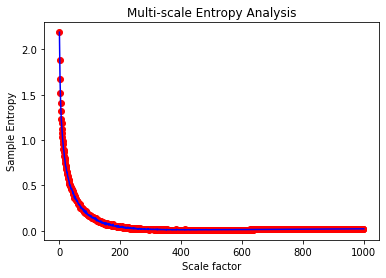

In [30]:
def calculate_MSE(time, signal, scale_factors):
    
    MSE = np.zeros(len(scale_factors))
    
    tol = 0.2*np.nanstd(signal)  
    
    for ii, nn in enumerate(scale_factors):
        x_coarse, y_coarse = coarse_grain(time, signal, nn)
        
        MSE[ii] = ent.sample_entropy(y_coarse, 3, tol)[-1]
        
    
    return MSE


maxScale = 1000
scale_factors = np.array(range(1,maxScale))

print(scale_factors)
mse = calculate_MSE(x, y, scale_factors)

tol = 0.2*np.nanstd(y)
mse_1 = ent.multiscale_entropy(y, 3, tol, maxScale)


        

In [ ]:
# Compare MSE calculated using pyentrp and and explicitly using sample entropy
plt.figure()
plt.plot(scale_factors, mse, 'ro')
plt.plot(np.array(range(maxScale))+1, mse_1, 'b-')
plt.xlabel('Scale factor')
plt.ylabel('Sample Entropy')
plt.title('Multi-scale Entropy Analysis')

---
# Running MSE analysis on different test signals
---

In [69]:

from pyentrp import entropy as ent
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
np.random.seed(1234567)
%matplotlib notebook

T = 4000

sampling_rate = 50
# no:of time points
N = int(T*sampling_rate)
pulse_peak_height = 1
# Peak width in seconds
pulse_peak_width = 20
n_peaks = 100

maxScale_time = 10

maxScale = int(maxScale_time*sampling_rate)

print('No:of data points at max coarse graining scale: {}'.format(int(N/maxScale)))

print('Max coarse graining scale: {}'.format(maxScale))

scale_factors = np.array(range(maxScale)) + 1

time = np.linspace(0,T, N)


# Generate different test-signals
white_noise_uniform = np.random.rand(N)

# Gaussian white noise with mean=0 and sigma=1
white_noise_gaussian = np.random.normal(0, 1, N)


# Signal with pulses at random locations
pulse_signal = np.zeros(N)

rand_ints = np.random.randint(0,N,n_peaks)

pulse_signal[rand_ints] = 1

regular_ints = range(0,N,int(N/n_peaks))

print(regular_ints)

pulse_signal_reg = np.zeros(N)
pulse_signal_reg[regular_ints] = 1

print('No :of pulses in random pulse signal : {}'.format(np.sum(pulse_signal)))

print('No :of pulses in regular pulse signal : {}'.format(np.sum(pulse_signal_reg)))


# Add white-noise to the pulsed-signals
# pulse_signal = pulse_signal + np.random.normal(0, 1/10, N)

# Sinusoidal signal

sinusoid = np.sin(2*np.pi*100*time/T)



def makeGaussianPulse(time, width, height):
    '''
    time: time array
    width: width of the peak in same units as time. 
    height: height of peak
    '''
    
    peak_width = 2*int(width/(time[1]-time[0]))
    
    print('Peak width: {}'.format(peak_width))
    
    gaussian_window = height*signal.gaussian(peak_width, std=width)

    
    peak_locs = np.random.randint(0,N,size = n_peaks)
    
    print('No:of Gaussian pulses: {}'.format(len(peak_locs)))
    
    gaussian_peaks_signal = np.zeros_like(time)
    
    for ii in peak_locs:
        
        min_index = max(0, ii - int(peak_width/2))
        max_index = min(len(time), ii + int(peak_width/2))
        
        
        min_index_window = min_index - ii + int(peak_width/2)
        max_index_window = max_index - ii + int(peak_width/2)
        
       
        
    
        gaussian_peaks_signal[min_index:max_index] = gaussian_window[min_index_window:max_index_window]
    
    return gaussian_peaks_signal



        
gaussian_peaks_signal = makeGaussianPulse(time, pulse_peak_width, pulse_peak_height)
    




No:of data points at max coarse graining scale: 200
Max coarse graining scale: 500
range(0, 100000, 1000)
No :of pulses in random pulse signal : 100.0
No :of pulses in regular pulse signal : 100.0
Peak width: 1998
No:of Gaussian pulses: 100


<IPython.core.display.Javascript object>


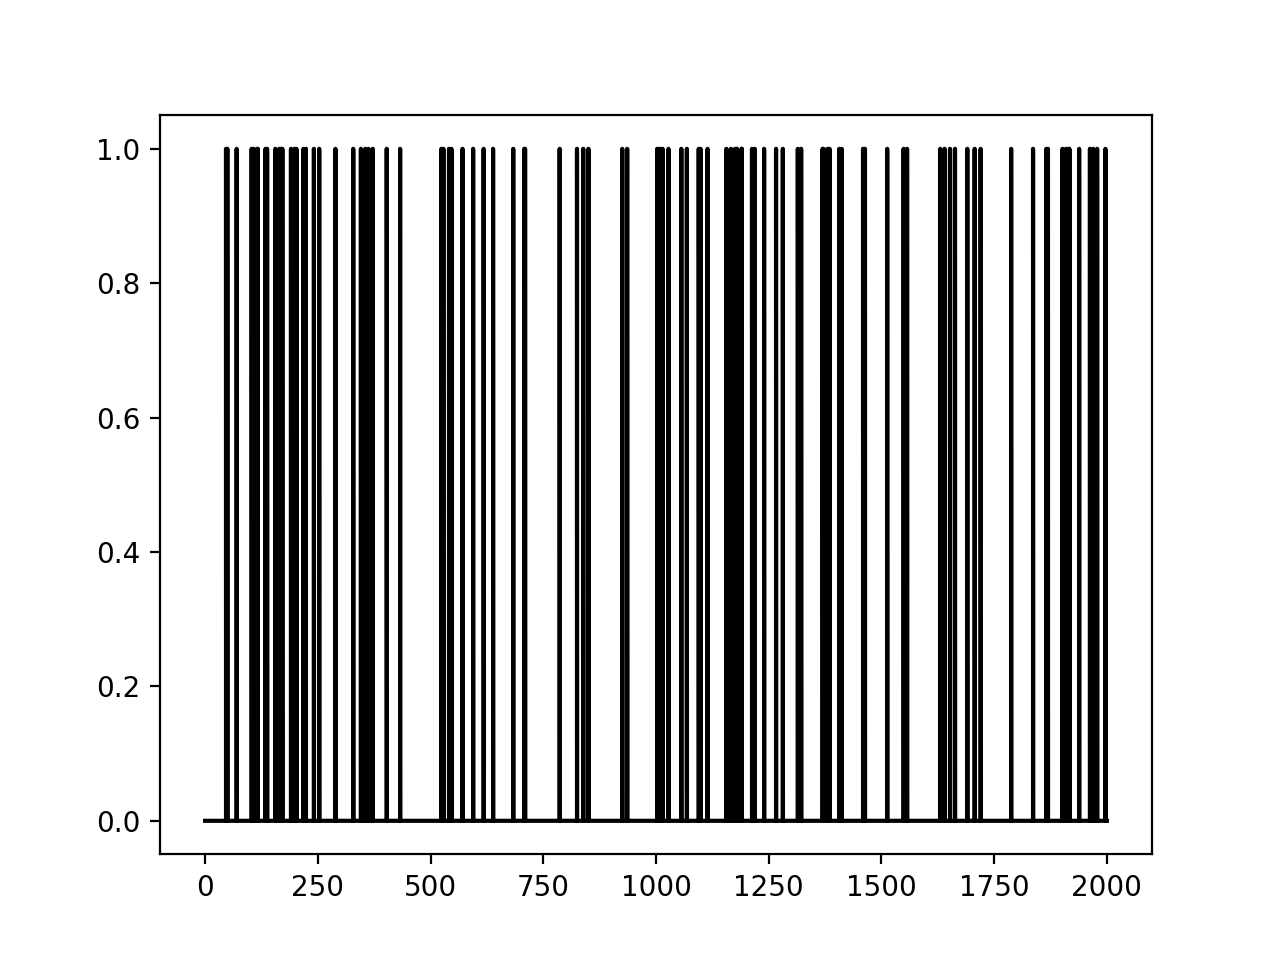

<IPython.core.display.Javascript object>


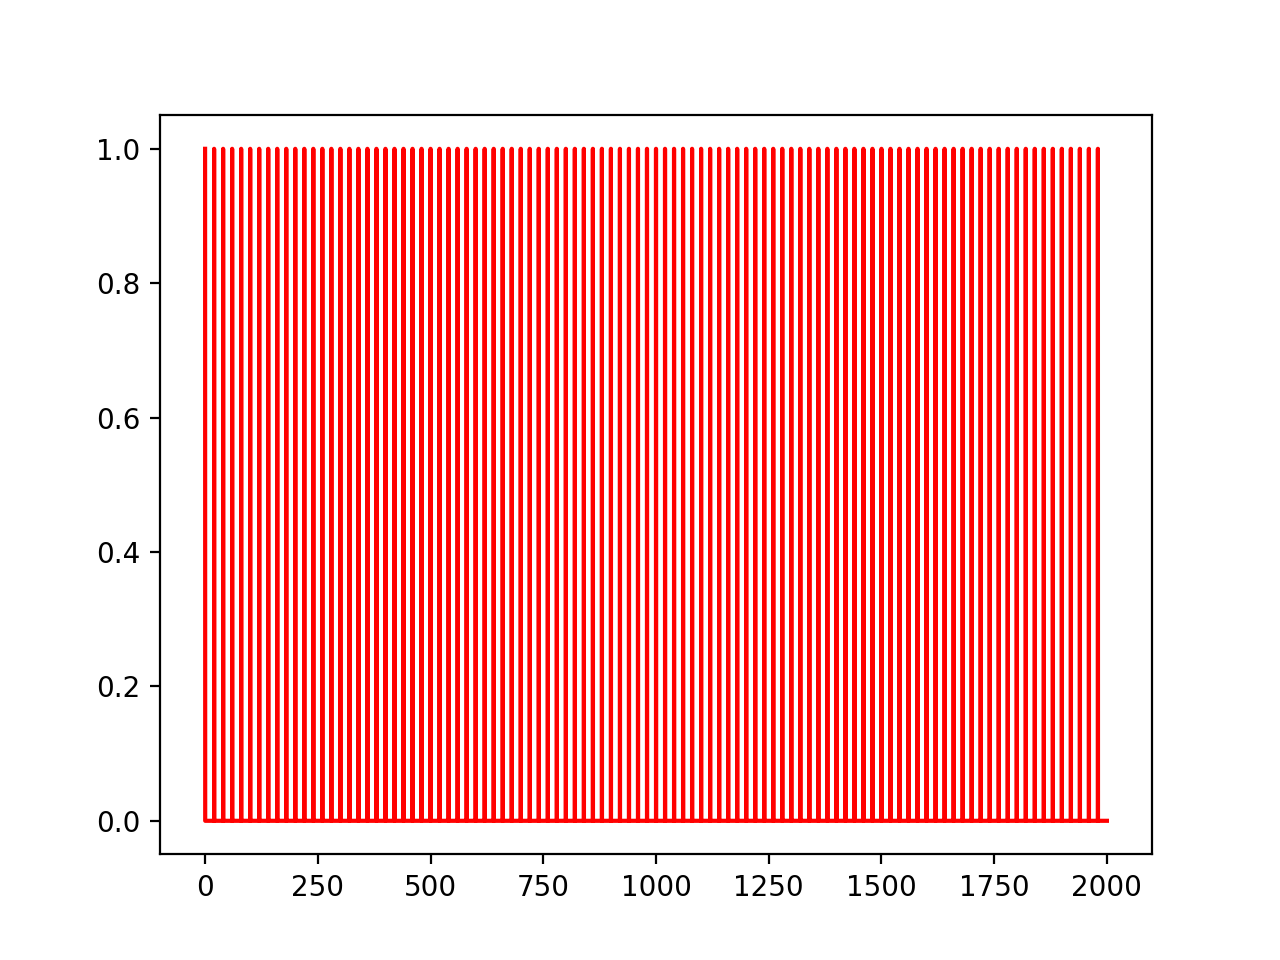

<IPython.core.display.Javascript object>


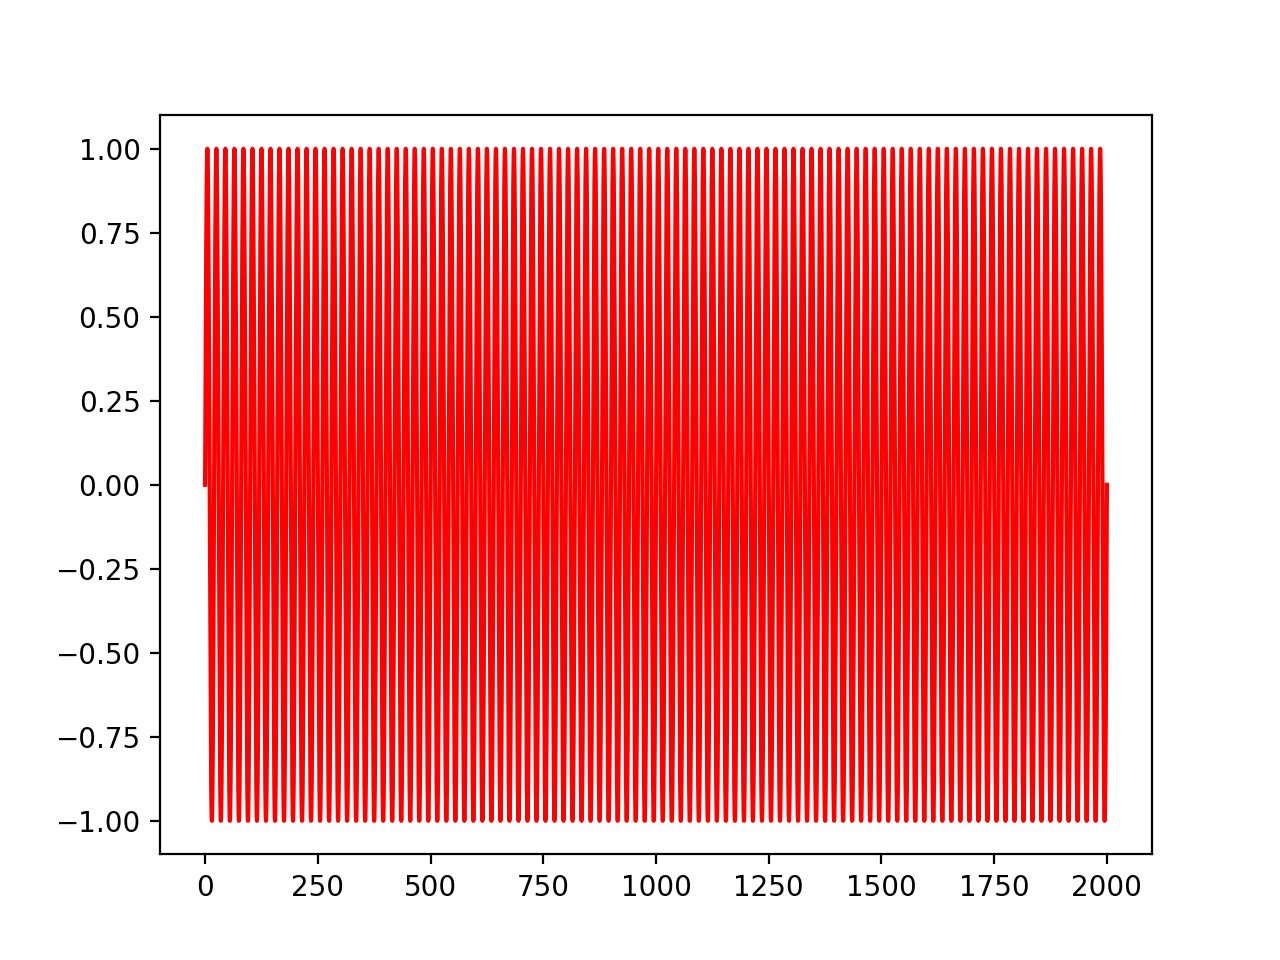

<IPython.core.display.Javascript object>


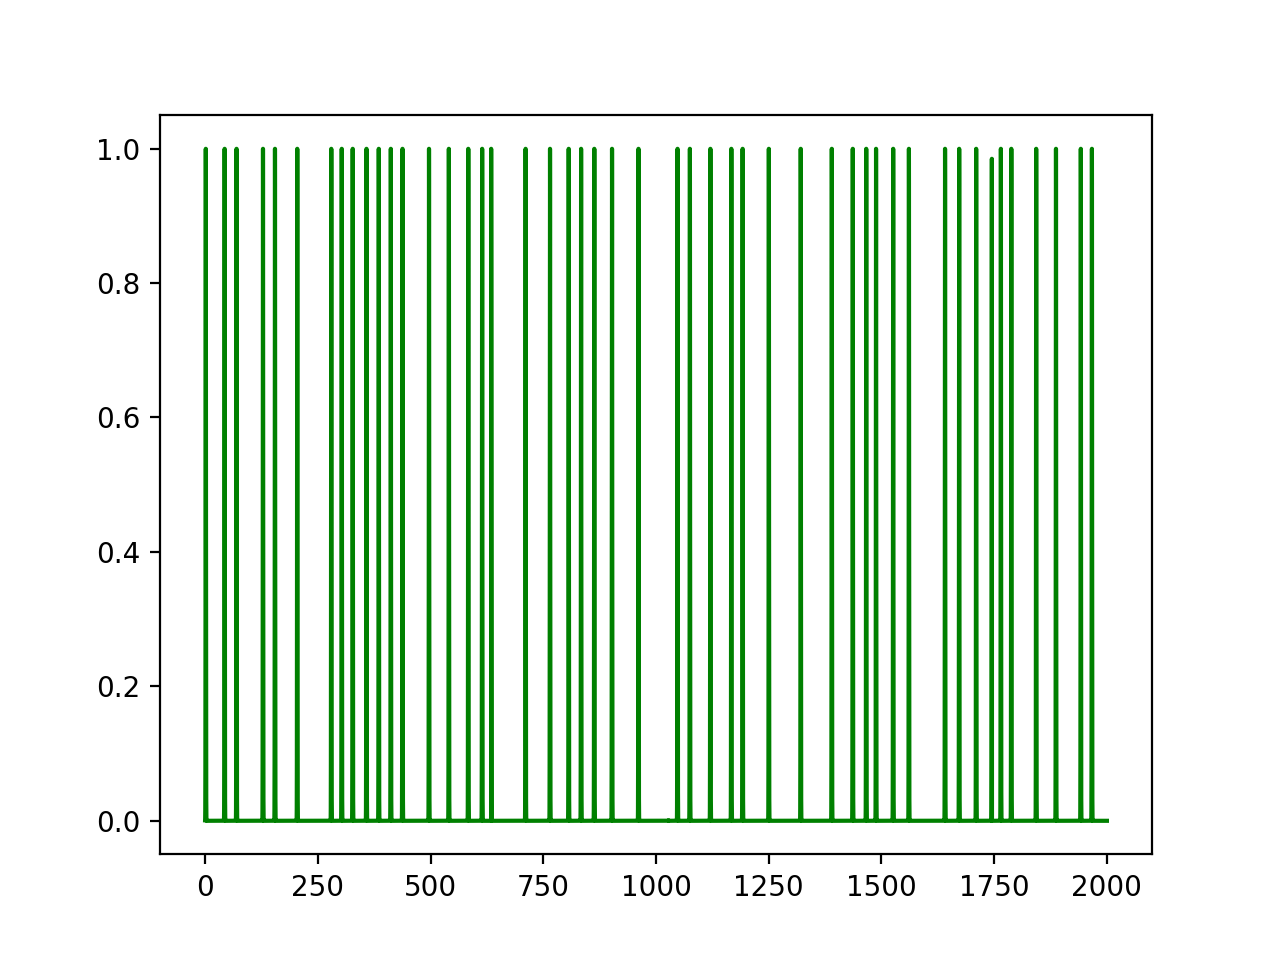

In [70]:
# Plot the test signals 
plt.figure()
plt.plot(time, pulse_signal, 'k-')

plt.figure()
plt.plot(time, pulse_signal_reg, 'r-')

plt.figure()
plt.plot(time, sinusoid, 'r-')

plt.figure()
plt.plot(time, gaussian_peaks_signal, 'g-')

Standard deviation of the signal: 0.2881462940452627


<IPython.core.display.Javascript object>


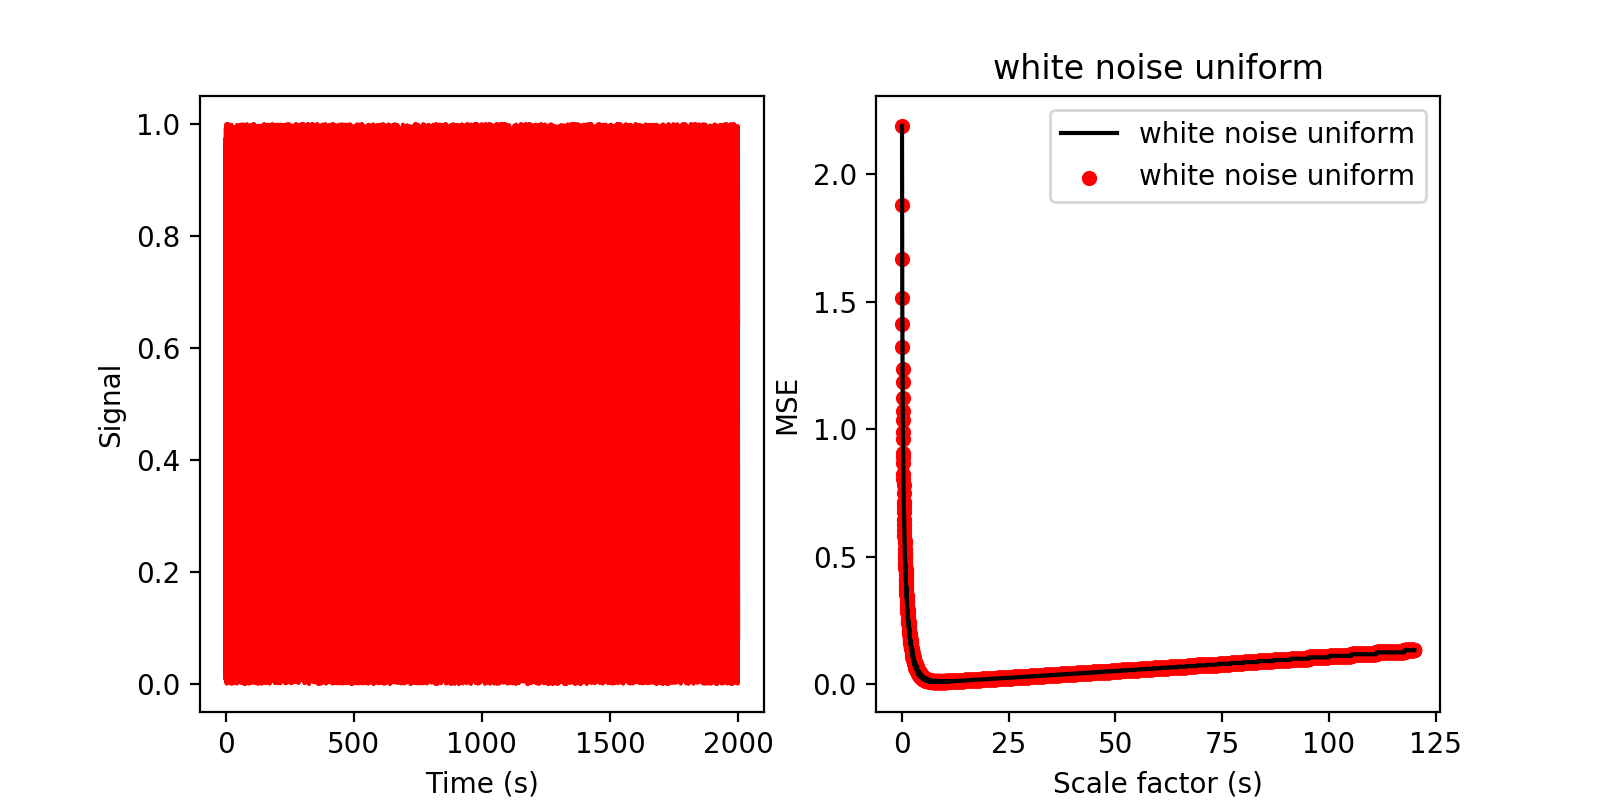

Standard deviation of the signal: 1.0005504627274064


<IPython.core.display.Javascript object>


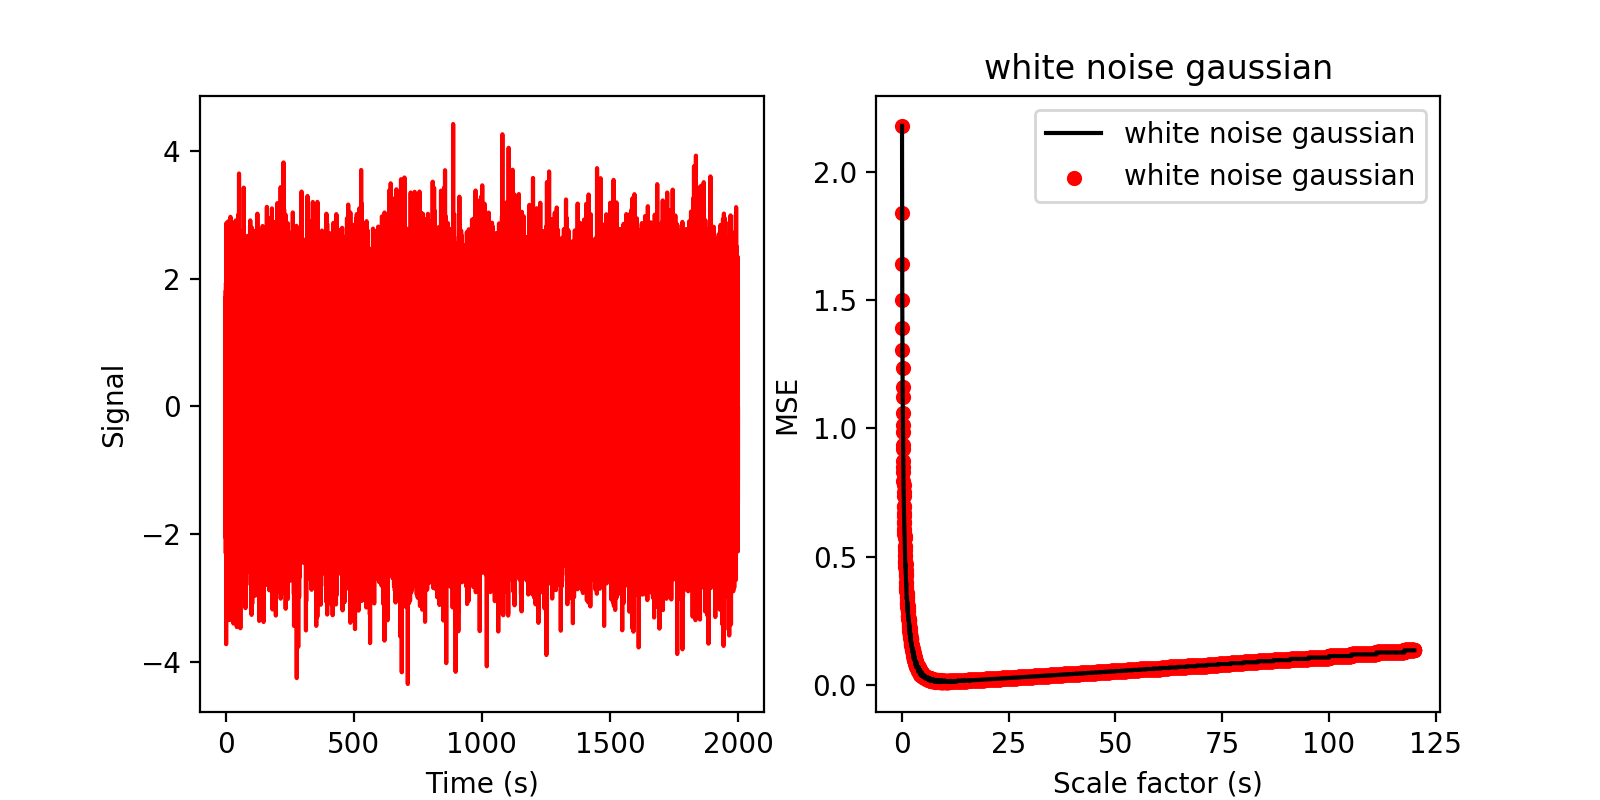

Standard deviation of the signal: 0.009999499987499378


<IPython.core.display.Javascript object>


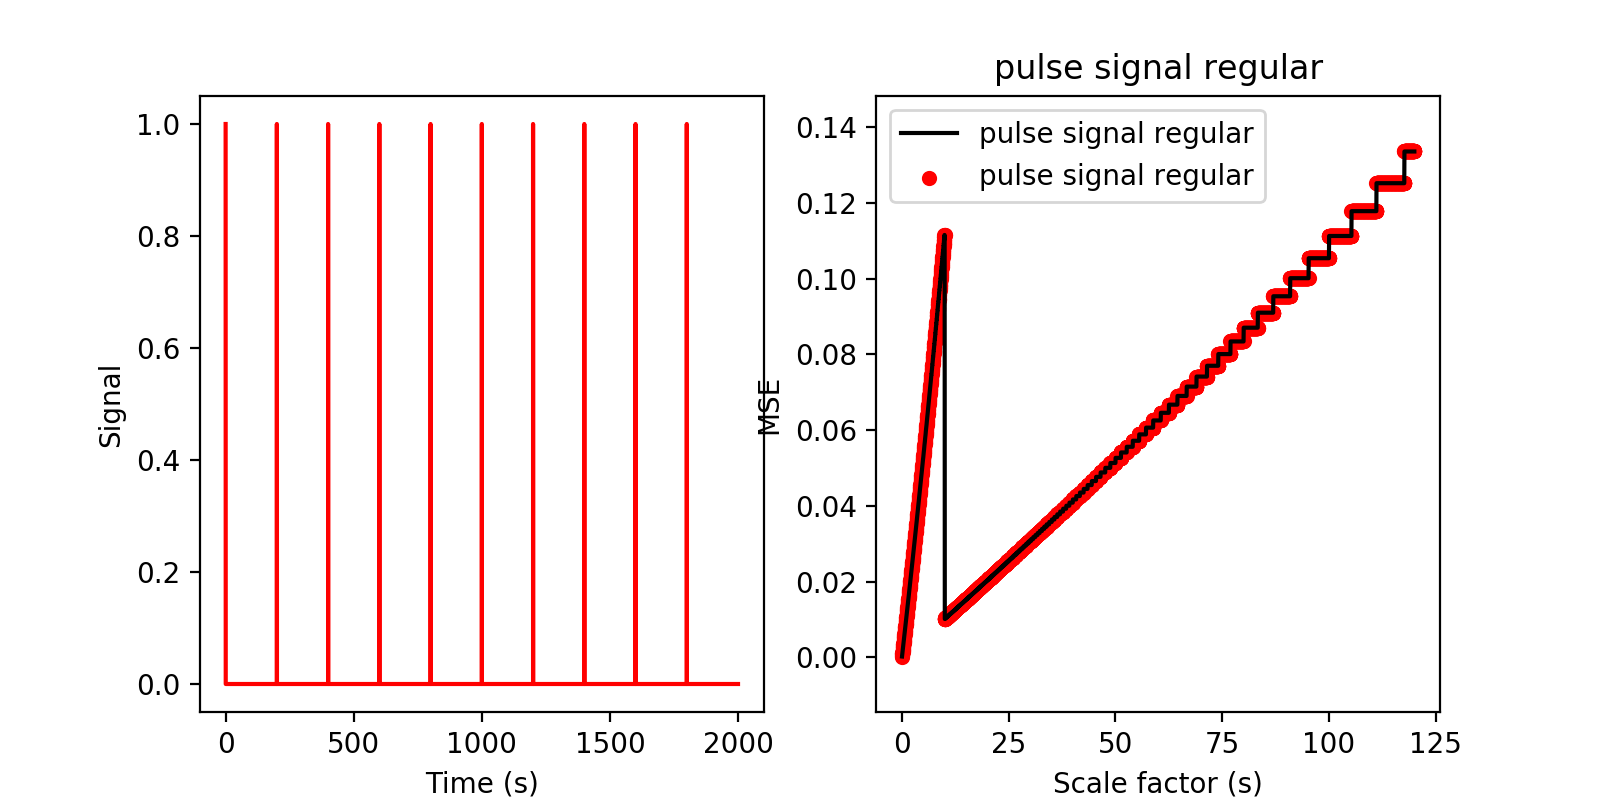

Standard deviation of the signal: 0.00999949998749938


<IPython.core.display.Javascript object>


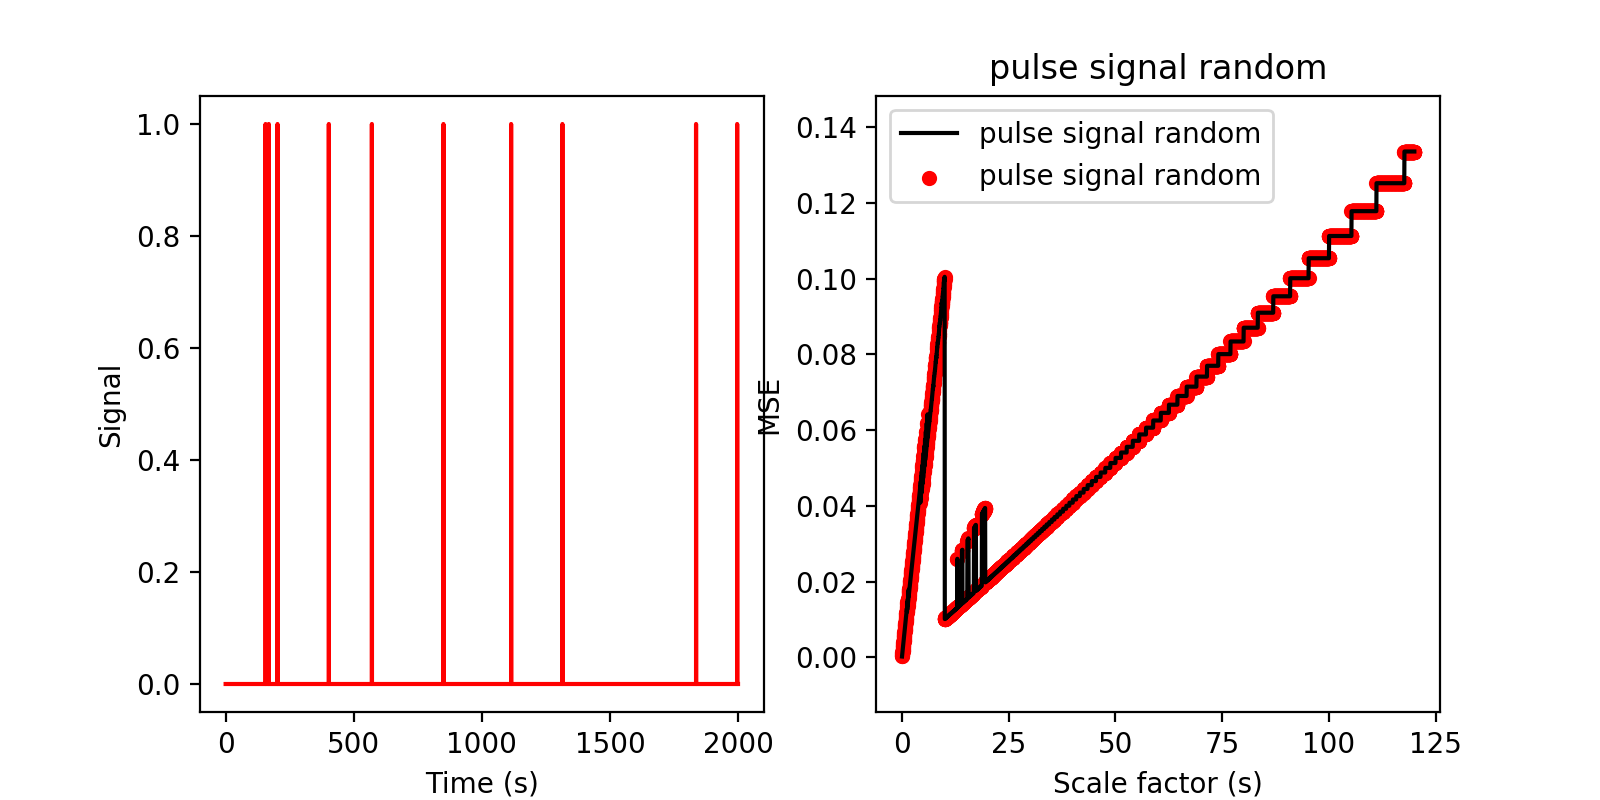

Standard deviation of the signal: 0.05932769134714677


<IPython.core.display.Javascript object>


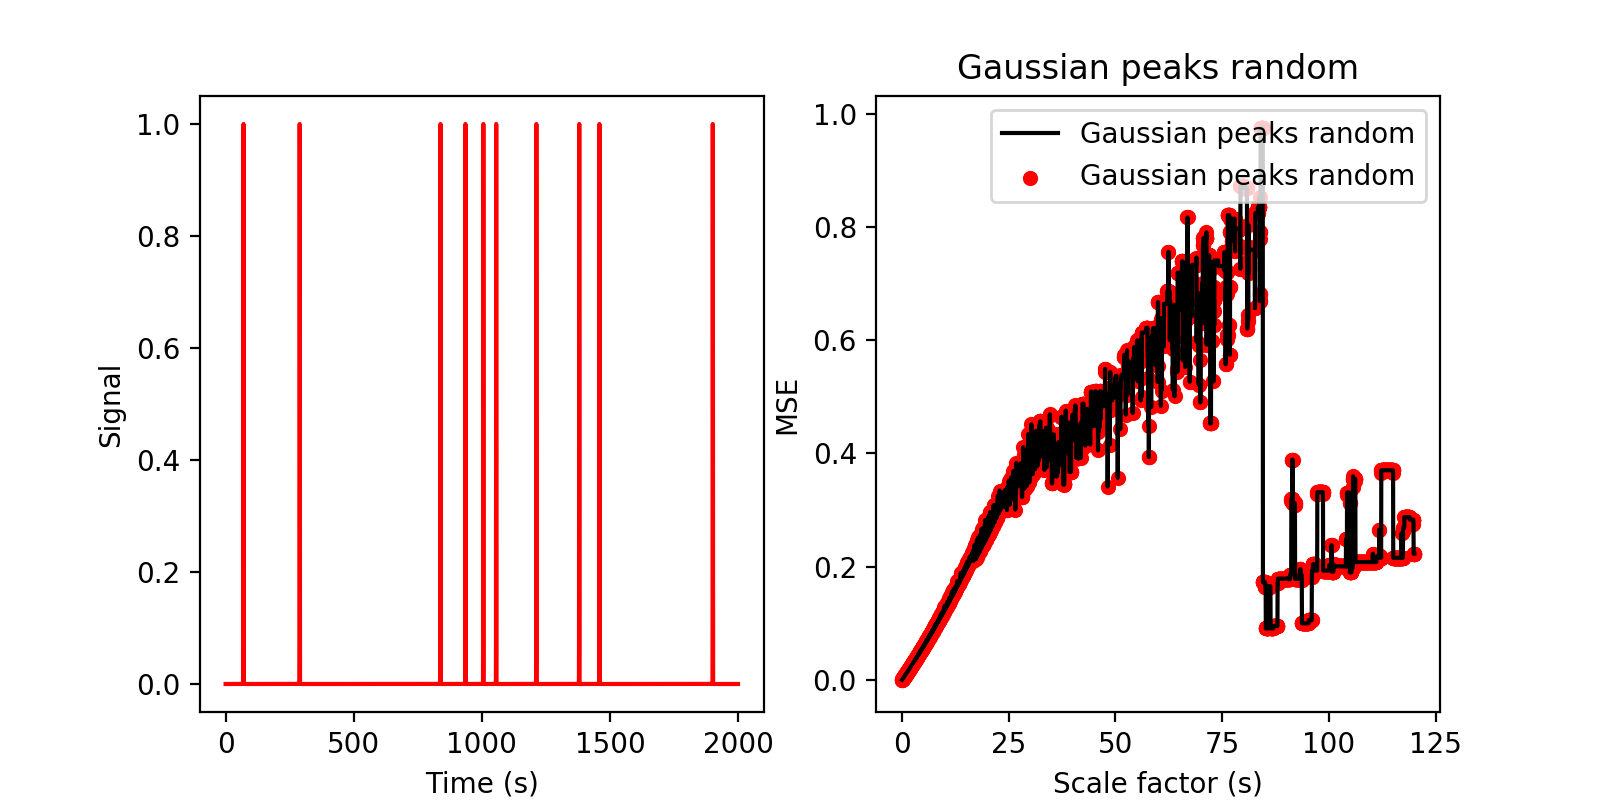

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c493e5b38>,
      dtype=object)

In [68]:
# Calculate MSE and plot them

def plot_signal_mse(time, signal, label, axes = None):
    
    tol = 0.2*np.nanstd(signal)
    print('Standard deviation of the signal: {}'.format(np.nanstd(signal)))
    mse = ent.multiscale_entropy(signal, 3, tol, maxScale)
    

    if(axes is None):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        
        

    axes[0].plot(time, signal, 'r-', label = label)
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Signal')

    axes[1].scatter(scale_factors*(T/N), mse, 20, color = 'r', label = label)
    axes[1].plot(scale_factors*(T/N), mse,color = 'k', label = label)
    axes[1].set_xlabel('Scale factor (s)')
    axes[1].set_ylabel('MSE')
    
    plt.title(label)
    plt.legend()
    
    return axes
    
    
    
axes = plot_signal_mse(time, white_noise_uniform, 'white noise uniform')
plot_signal_mse(time, white_noise_gaussian, 'white noise gaussian')
# plt.savefig('Whitenoise.png',dpi = 150)
plot_signal_mse(time, pulse_signal_reg, 'pulse signal regular')

plot_signal_mse(time, pulse_signal, 'pulse signal random')
# plt.savefig('PulseSignal_random.png',dpi = 150)
plot_signal_mse(time, gaussian_peaks_signal, 'Gaussian peaks random')





In [106]:
time_coarse, signal_coarse = coarse_grain(time, pulse_signal, 190)

<IPython.core.display.Javascript object>


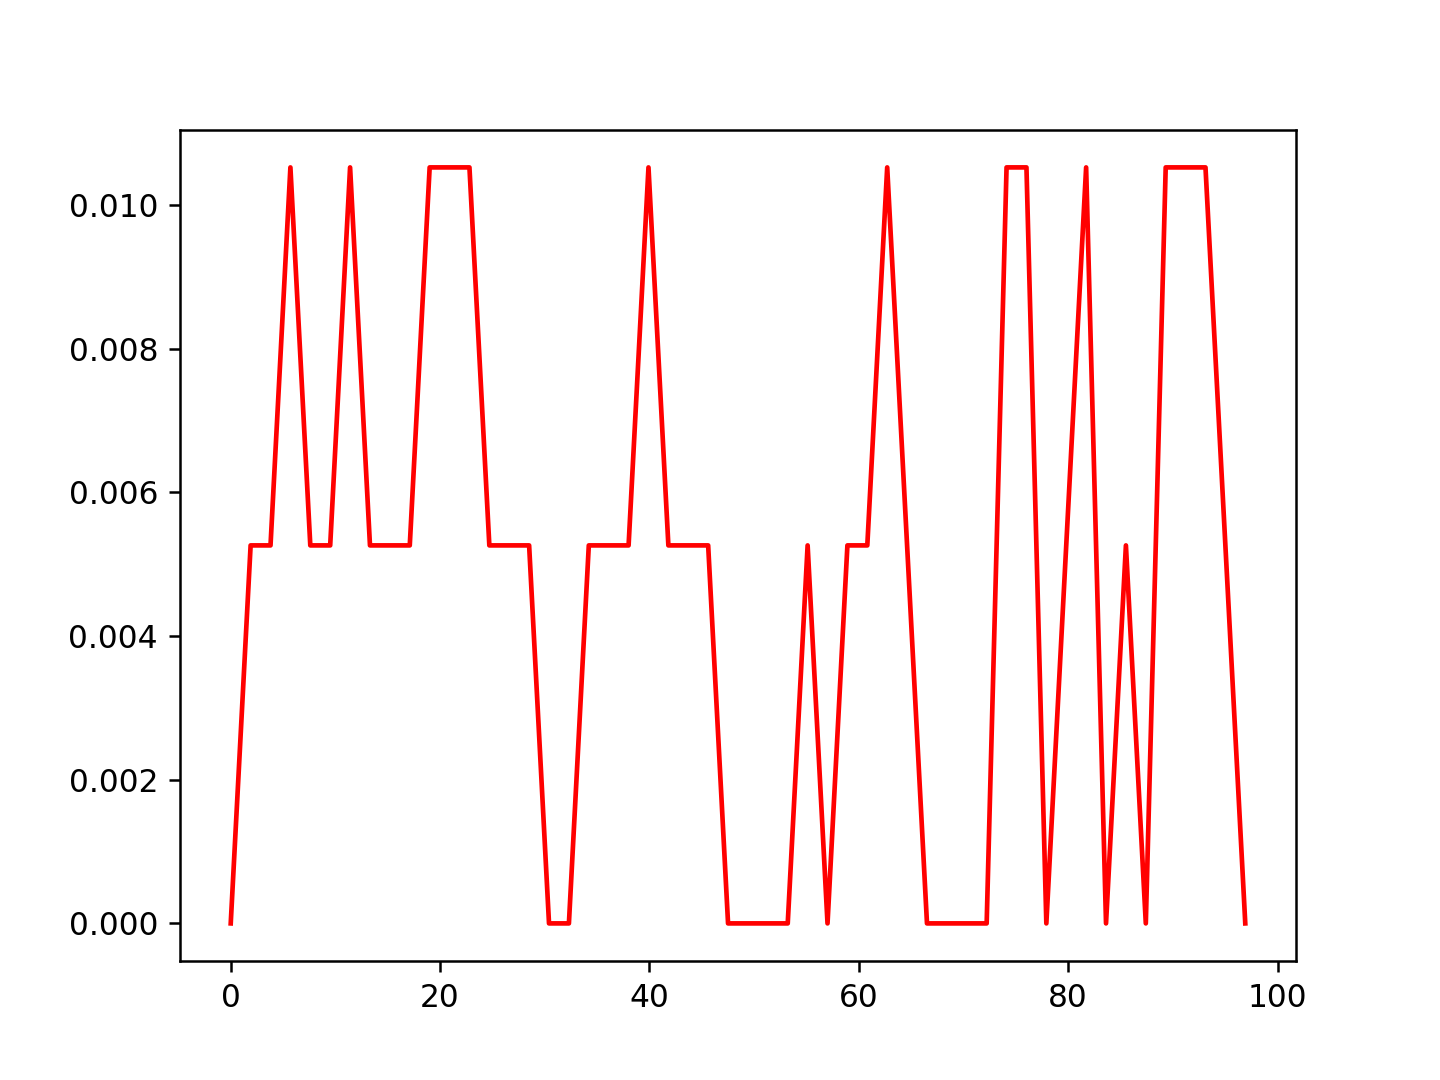

In [107]:
plt.figure()
plt.plot(time_coarse, signal_coarse, 'r-')

In [8]:
print('Sample entropy of white-noise: {}'.format(ent.sample_entropy(white_noise_gaussian, 3, 0.2*np.nanstd(white_noise_gaussian))[-1]))
print('Sample entropy of sinusoid: {}'.format(ent.sample_entropy(sinusoid, 3, 0.2*np.nanstd(sinusoid))[-1]))


Sample entropy of white-noise: 2.198617359635593
Sample entropy of sinusoid: 0.1657098209793443
